In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import salem
from utils import constants as cnst
from wavelet import util, wav
from scipy.ndimage.measurements import label
from scipy import ndimage
from utils import u_arrays as ua, u_grid
from wavelet import util
import numpy.ma as ma
import pickle as pkl
from eod import mfg
from utils import u_grid, u_interpolate as u_int
from kpywavelet import wavelet as wvt
from utils import u_plot as uplot

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

/tmp/ipykernel_1292406/783167702.py:15: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [4]:
cd ..

/users/global/cornkle/pythonWorkspace


In [21]:
# Open multiple files and add a "month" coordinate from filenames
ds = xr.open_mfdataset('/users/global/cornkle/shared/data/LST_trend_global/LSTtrend_scales_perMonth_POSITIVE_*.nc', concat_dim="month", combine="nested")

# Assign a month coordinate (assuming filenames are sequentially numbered)
ds = ds.assign_coords(month=np.arange(1, 13))

In [23]:
ds

<xarray.Dataset>
Dimensions:  (scales: 15, lon: 7200, lat: 3600, month: 12)
Coordinates:
  * scales   (scales) float64 15.0 19.79 26.12 34.46 ... 316.7 417.9 551.4 727.5
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 179.9
  * lat      (lat) float32 -90.0 -89.95 -89.9 -89.85 ... 89.8 89.85 89.9 89.95
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    power_y  (month, scales, lon, lat) float64 dask.array<chunksize=(1, 15, 7200, 3600), meta=np.ndarray>
    power_x  (month, scales, lon, lat) float64 dask.array<chunksize=(1, 15, 7200, 3600), meta=np.ndarray>
    trend    (month, lon, lat) float32 dask.array<chunksize=(1, 7200, 3600), meta=np.ndarray>

In [25]:
# Compute the indices of the max scale in memory
max_scale_idx_x = ds.power_x.argmax(dim="scales").compute()
max_scale_idx_y = ds.power_y.argmax(dim="scales").compute()

# Use these indices to extract the corresponding scale values
max_scale_x = ds.scales[max_scale_idx_x]
max_scale_y = ds.scales[max_scale_idx_y]

In [31]:
# Check if max scale falls in the 100-200 km range for each month
valid_x = (max_scale_x >= 100) & (max_scale_x <= 200)
valid_y = (max_scale_y >= 100) & (max_scale_y <= 200)

# Combine both conditions
valid_months = valid_x | valid_y  # Boolean array (True if condition met for each month)

# Count how many months meet the condition per pixel
count_valid_months = valid_months.sum(dim="month")

# Create binary map (1 if at least 3 months meet condition, 0 otherwise)
binary_map = (count_valid_months >= 6).astype(int)

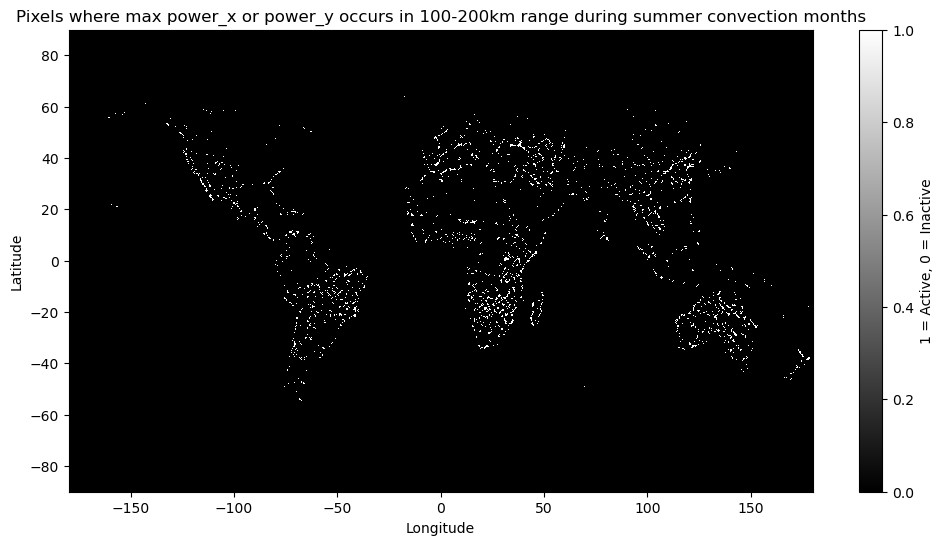

In [32]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(ds.lon, ds.lat, binary_map.T, cmap="gray", shading="auto")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pixels where max power_x or power_y occurs in 100-200km range during summer convection months")
plt.colorbar(label="1 = Active, 0 = Inactive")
plt.show()

In [33]:
import rioxarray  # Extends xarray to read raster files

ModuleNotFoundError: No module named 'rioxarray'